In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [2]:
mat=loadmat("ex8data1.mat")
X=mat["X"]
Xval=mat["Xval"]
yval=mat["yval"]

Text(0, 0.5, 'Throughput (mb/s)')

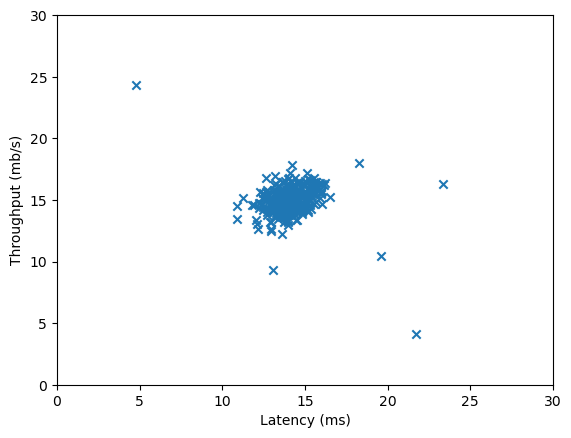

In [3]:
plt.scatter(X[:,0],X[:,1],marker="x")
plt.xlim(0,30)
plt.ylim(0,30)
plt.xlabel("Latency (ms)")
plt.ylabel("Throughput (mb/s)")

In [4]:
def estimateGaussian(X):
    """
     This function estimates the parameters of a Gaussian distribution using the data in X
    """
    
    m = X.shape[0]
    
    #compute mean
    sum_ = np.sum(X,axis=0)
    mu = 1/m *sum_
    
    # compute variance
    var = 1/m * np.sum((X - mu)**2,axis=0)
    
    return mu,var

In [5]:
mu, sigma2 = estimateGaussian(X)

Multivariate Gaussian Distribution

In [11]:
def multivariateGaussian(X, mu, sigma2):
    """
    Computes the probability density function of the multivariate gaussian distribution.
    """
    k = len(mu)
    
    sigma2=np.diag(sigma2)
    X = X - mu.T
    p = 1/((2*np.pi)**(k/2)*(np.linalg.det(sigma2)**0.5))* np.exp(-0.5* np.sum(X @ np.linalg.pinv(sigma2) * X,axis=1))
    return p

In [12]:
p = multivariateGaussian(X, mu, sigma2)

C:\Users\bizm\AppData\Local\Temp\ipykernel_2876\3269513192.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  contour_level = 10**np.array([np.arange(-20,0,3,dtype=np.float)]).T


ValueError: zero-size array to reduction operation minimum which has no identity

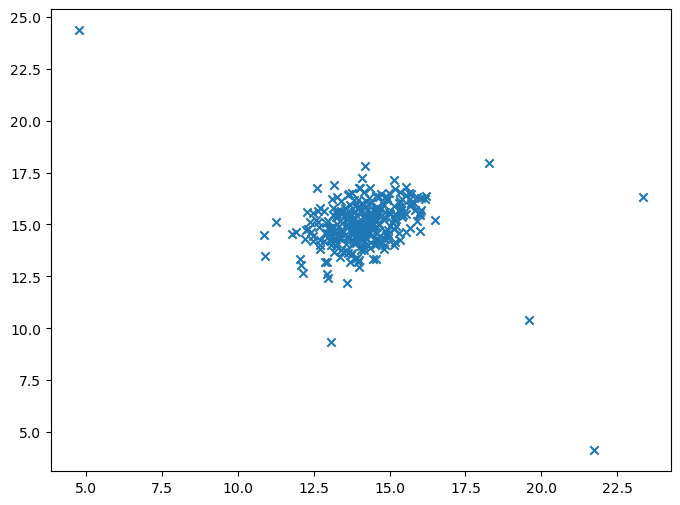

In [13]:
plt.figure(figsize=(8,6))
plt.scatter(X[:,0],X[:,1],marker="x")
X1,X2 = np.meshgrid(np.linspace(0,35,num=70),np.linspace(0,35,num=70))
p2 = multivariateGaussian(np.hstack((X1.flatten()[:,np.newaxis],X2.flatten()[:,np.newaxis])), mu, sigma2)
contour_level = 10**np.array([np.arange(-20,0,3,dtype=np.float)]).T
plt.contour(X1,X2,p2[:,np.newaxis].reshape(X1.shape),contour_level)
plt.xlim(0,35)
plt.ylim(0,35)
plt.xlabel("Latency (ms)")
plt.ylabel("Throughput (mb/s)")

Threshlod Select 

In [14]:
def selectThreshold(yval,pval):
    best_epi=0
    best_F1=0
    stepsize=(max(pval)-min(pval))/1000
    epi_range=np.arange(pval.min(),pval.max(),stepsize)
    for epi in epi_range:
        predictions=(pval<epi)[:,np.newaxis]
        tp=np.sum(predictions[yval==1]==1)
        fp=np.sum(predictions[yval==0]==1)
        fn=np.sum(predictions[yval==1]==0)
        prec=tp/(tp+fp)
        rec=tp/(tp+fn)
        F1=(2*prec*rec)/(prec+rec)
        if F1>best_F1:
            best_F1=F1
            best_epi=epi
    return best_epi, best_F1

Visualize Anomalies

In [15]:
pval = multivariateGaussian(Xval, mu, sigma2)
epsilon, F1 = selectThreshold(yval, pval)
print("Best epsilon found using cross-validation:",epsilon)
print("Best F1 on Cross Validation Set:",F1)

Best epsilon found using cross-validation: 8.990852779269495e-05
Best F1 on Cross Validation Set: 0.8750000000000001


C:\Users\bizm\AppData\Local\Temp\ipykernel_2876\308942360.py:11: RuntimeWarning: invalid value encountered in long_scalars
  prec=tp/(tp+fp)


C:\Users\bizm\AppData\Local\Temp\ipykernel_2876\3677003980.py:9: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  contour_level = 10**np.array([np.arange(-20,0,3,dtype=np.float)]).T


ValueError: zero-size array to reduction operation minimum which has no identity

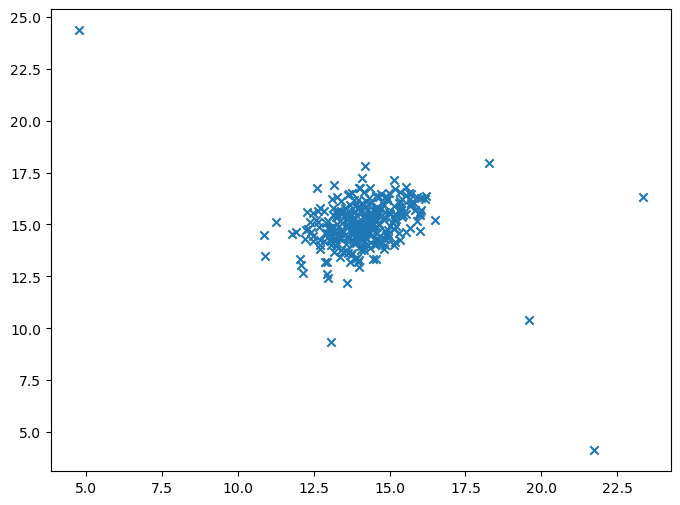

In [17]:
plt.figure(figsize=(8,6))

# plot the data
plt.scatter(X[:,0],X[:,1],marker="x")

# potting of contour
X1,X2 = np.meshgrid(np.linspace(0,35,num=70),np.linspace(0,35,num=70))
p2 = multivariateGaussian(np.hstack((X1.flatten()[:,np.newaxis],X2.flatten()[:,np.newaxis])), mu, sigma2)
contour_level = 10**np.array([np.arange(-20,0,3,dtype=np.float)]).T
plt.contour(X1,X2,p2[:,np.newaxis].reshape(X1.shape),contour_level)

# Circling of anomalies
outliers = np.nonzero(p<epsilon)[0]
plt.scatter(X[outliers,0],X[outliers,1],marker ="o",facecolor="none",edgecolor="r",s=70)

plt.xlim(0,35)
plt.ylim(0,35)
plt.xlabel("Latency (ms)")
plt.ylabel("Throughput (mb/s)")

High Dimensional Dataset

In [18]:
mat2=loadmat("ex8data2.mat")
X2=mat2["X"]
Xval2=mat2["Xval"]
yval2=mat2["yval"]

In [19]:
mu2,sigma2_2=estimateGaussian(X2)

In [22]:
p3=multivariateGaussian(X2,mu2,sigma2_2)
pval2=multivariateGaussian(Xval2,mu2,sigma2_2)
epsilon2,F1_2=selectThreshold(yval2,pval2)
print("Best epsilon found using cross-validation:",epsilon2)
print("Best F1 on cross validation set:",F1_2)
print("# of Outliers found:",np.sum(p3<epsilon2))

Best epsilon found using cross-validation: 1.3772288907613575e-18
Best F1 on cross validation set: 0.6153846153846154
# of Outliers found: 117


C:\Users\bizm\AppData\Local\Temp\ipykernel_2876\308942360.py:11: RuntimeWarning: invalid value encountered in long_scalars
  prec=tp/(tp+fp)


Recommender Systems

In [24]:
mat3 = loadmat("ex8_movies.mat")
mat4 = loadmat("ex8_movieParams.mat")
Y = mat3["Y"] # 1682 X 943 matrix, containing ratings (1-5) of 1682 movies on 943 user
R = mat3["R"] # 1682 X 943 matrix, where R(i,j) = 1 if and only if user j give rating to movie i
X = mat4["X"] # 1682 X 10 matrix , num_movies X num_features matrix of movie features
Theta = mat4["Theta"] # 943 X 10 matrix, num_users X num_features matrix of user features

In [25]:
print("Average rating for movie 1 (Toy Story):",np.sum(Y[0,:]*R[0,:])/np.sum(R[0,:]),"/5")

Average rating for movie 1 (Toy Story): 3.8783185840707963 /5


Visualise rating matrix

Text(0, 0.5, 'Movies')

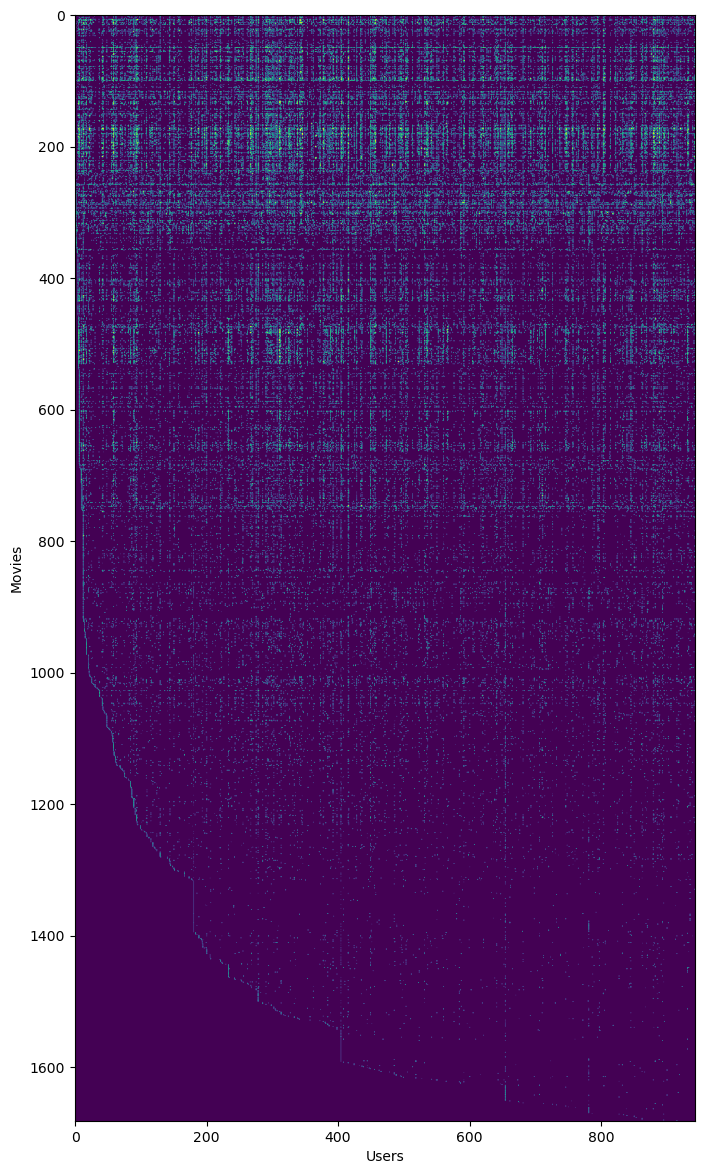

In [26]:
plt.figure(figsize=(8,16))
plt.imshow(Y)
plt.xlabel("Users")
plt.ylabel("Movies")

Collaborative Filtering Learning Algorithm

In [30]:
def cofiCostFunc(params,Y,R,num_users,num_movies,num_features,Lambda):
    X=params[:num_movies*num_features].reshape(num_movies,num_features)
    Theta=params[num_movies*num_features:].reshape(num_users,num_features)
    predictions=X@Theta.T
    err=(predictions-Y)
    J=1/2*np.sum((err**2)*R)
    # Cost Function
    reg_X=Lambda/2*np.sum(Theta**2)
    reg_Theta=Lambda/2*np.sum(X**2)
    reg_J=J+reg_X+reg_Theta
    #Compute Gradient
    X_grad=err*R@Theta
    Theta_grad=(err*R).T@X
    grad=np.append(X_grad.flatten(),Theta_grad.flatten())
    #Regularized Gradient
    reg_X_grad=X_grad+Lambda*X
    reg_Theta_grad=Theta_grad+Lambda*Theta
    reg_grad=np.append(reg_X_grad.flatten(),reg_Theta_grad.flatten())
    return J,grad,reg_J,reg_grad
    

In [31]:
num_users, num_movies, num_features = 4,5,3
X_test = X[:num_movies,:num_features]
Theta_test= Theta[:num_users,:num_features]
Y_test = Y[:num_movies,:num_users]
R_test = R[:num_movies,:num_users]
params = np.append(X_test.flatten(),Theta_test.flatten())

# Evaluate cost function
J, grad = cofiCostFunc(params, Y_test, R_test, num_users, num_movies, num_features, 0)[:2]
print("Cost at loaded parameters:",J)

J2, grad2 = cofiCostFunc(params, Y_test, R_test, num_users, num_movies, num_features, 1.5)[2:]
print("Cost at loaded parameters (lambda = 1.5):",J2)

Cost at loaded parameters: 22.224603725685675
Cost at loaded parameters (lambda = 1.5): 31.34405624427422


Learning Movie Recommendations

In [33]:
movieList = open("movie_ids.txt","r").read().split("\n")[:-1]

# see movie list
np.set_printoptions(threshold=np.nan)
movieList

ValueError: threshold must be non-NAN, try sys.maxsize for untruncated representation

In [34]:
def normalizeRatings(Y, R):
    """
    normalized Y so that each movie has a rating of 0 on average, and returns the mean rating in Ymean.
    """
    
    m,n = Y.shape[0], Y.shape[1]
    Ymean = np.zeros((m,1))
    Ynorm = np.zeros((m,n))
    
    for i in range(m):
        Ymean[i] = np.sum(Y[i,:])/np.count_nonzero(R[i,:])
        Ynorm[i,R[i,:]==1] = Y[i,R[i,:]==1] - Ymean[i]
        
    return Ynorm, Ymean

In [35]:
def gradientDescent(initial_parameters,Y,R,num_users,num_movies,num_features,alpha,num_iters,Lambda):
    """
    Optimize X and Theta
    """
    # unfold the parameters
    X = initial_parameters[:num_movies*num_features].reshape(num_movies,num_features)
    Theta = initial_parameters[num_movies*num_features:].reshape(num_users,num_features)
    
    J_history =[]
    
    for i in range(num_iters):
        params = np.append(X.flatten(),Theta.flatten())
        cost, grad = cofiCostFunc(params, Y, R, num_users, num_movies, num_features, Lambda)[2:]
        
        # unfold grad
        X_grad = grad[:num_movies*num_features].reshape(num_movies,num_features)
        Theta_grad = grad[num_movies*num_features:].reshape(num_users,num_features)
        X = X - (alpha * X_grad)
        Theta = Theta - (alpha * Theta_grad)
        J_history.append(cost)
    
    paramsFinal = np.append(X.flatten(),Theta.flatten())
    return paramsFinal , J_history

In [36]:
Y = np.hstack((my_ratings,Y))
R =np.hstack((my_ratings!=0,R))

# Normalize Ratings
Ynorm, Ymean = normalizeRatings(Y, R)

NameError: name 'my_ratings' is not defined